# Basic Exercises
## 1. Basic Classification Methods
### Exercise 1: Implementing Basic Classification Algorithms
* Objective: Get familiar with basic classification techniques using Scikit-learn.
* Tasks:
1) Load a simple dataset (e.g., Iris or Wine dataset).
2) Implement a basic classification algorithm (e.g., Logistic Regression or K-Nearest Neighbors).
3) Train the model and evaluate its accuracy using a test set.

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

data = load_iris()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=200, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {log_reg_accuracy:.4f}")

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"K-Nearest Neighbors Accuracy: {knn_accuracy:.4f}")

Logistic Regression Accuracy: 1.0000
K-Nearest Neighbors Accuracy: 1.0000


### Exercise 2: Confusion Matrix and Classification Report
* Objective: Understand model evaluation metrics.
* Tasks:
1) Use the trained model to make predictions on the test set.
2) Generate a confusion matrix and classification report using Scikit-learn.
3) Discuss the results, focusing on precision, recall, and F1-score.

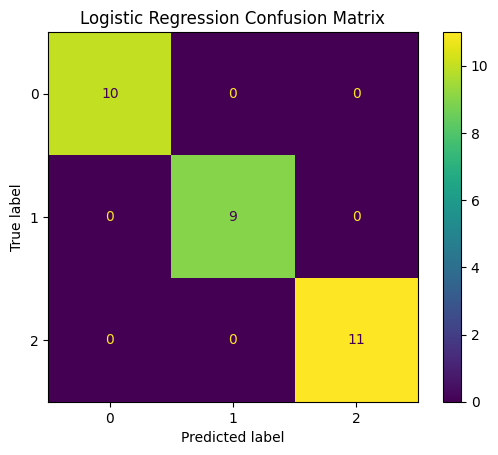


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [2]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred_log_reg)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

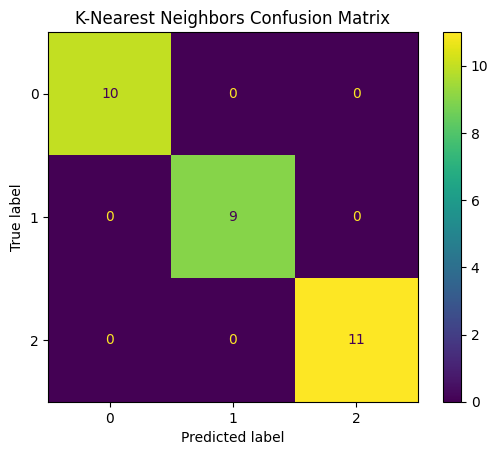


K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [3]:
conf_matrix = confusion_matrix(y_test, y_pred_knn)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()
plt.title("K-Nearest Neighbors Confusion Matrix")
plt.show()

print("\nK-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred_knn))

## 2. Clustering Techniques
### Exercise 3: Implementing K-Means Clustering
* Objective: Apply K-Means clustering to a dataset.
* Tasks:
1) Load a dataset (e.g., customer data or a toy dataset).
2) Use K-Means to group the data into clusters.
3) Visualize the clusters using a scatter plot.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


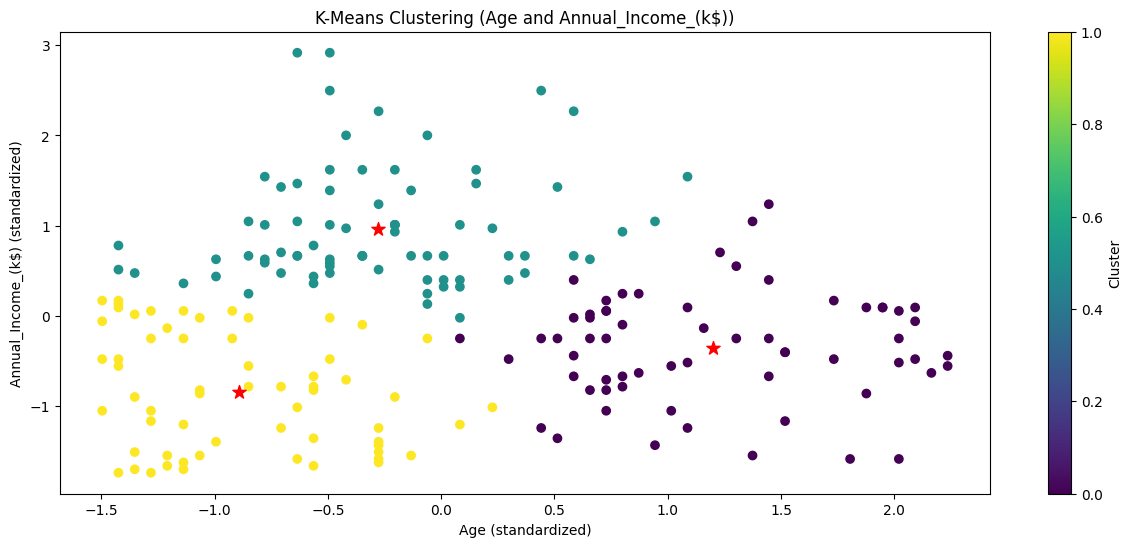

In [20]:
X = df[['Age', 'Annual_Income_(k$)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

centroids = kmeans.cluster_centers_
plt.figure(figsize=(15, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster'], cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='*', s=100, label='Centroids')
plt.title('K-Means Clustering (Age and Annual_Income_(k$))')
plt.xlabel('Age (standardized)')
plt.ylabel('Annual_Income_(k$) (standardized)')
plt.colorbar(label='Cluster')
plt.show()

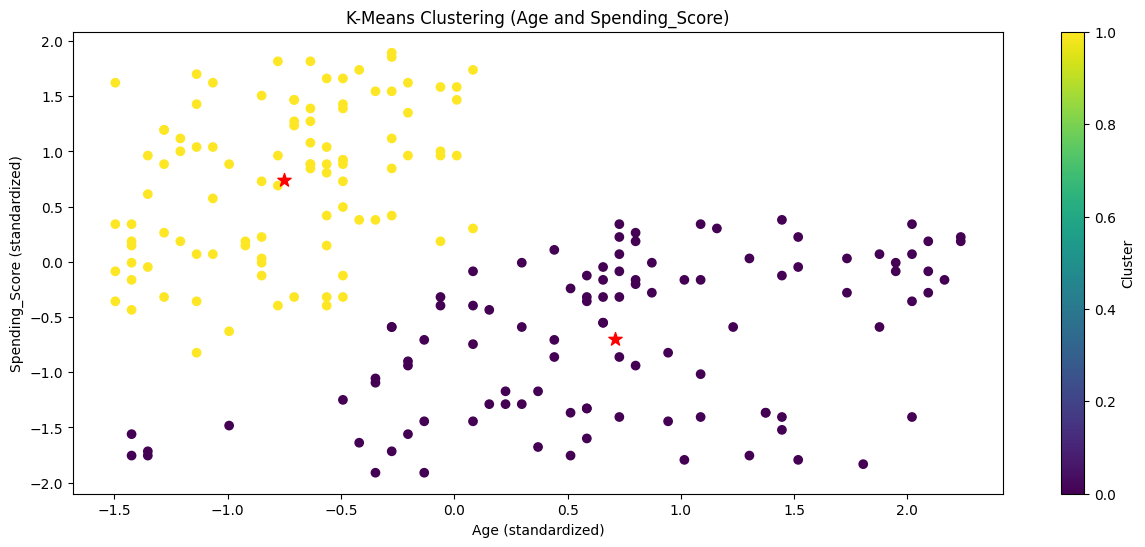

In [6]:
Y = df[['Age', 'Spending_Score']]

scaler = StandardScaler()
Y_scaled = scaler.fit_transform(Y)

kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(Y_scaled)

centroids = kmeans.cluster_centers_
plt.figure(figsize=(15, 6))
plt.scatter(Y_scaled[:, 0], Y_scaled[:, 1], c=df['Cluster'], cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='*', s=100, label='Centroids')
plt.title('K-Means Clustering (Age and Spending_Score)')
plt.xlabel('Age (standardized)')
plt.ylabel('Spending_Score (standardized)')
plt.colorbar(label='Cluster')
plt.show()

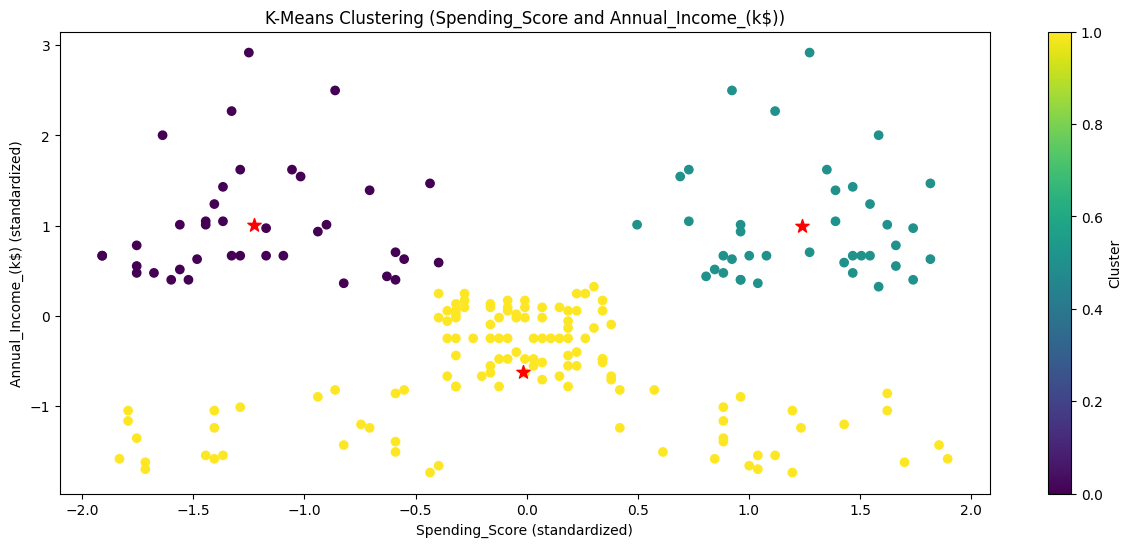

In [21]:
Z = df[['Spending_Score', 'Annual_Income_(k$)']]

scaler = StandardScaler()
Z_scaled = scaler.fit_transform(Z)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(Z_scaled)

centroids = kmeans.cluster_centers_
plt.figure(figsize=(15, 6))
plt.scatter(Z_scaled[:, 0], Z_scaled[:, 1], c=df['Cluster'], cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='*', s=100, label='Centroids')
plt.title('K-Means Clustering (Spending_Score and Annual_Income_(k$))')
plt.xlabel('Spending_Score (standardized)')
plt.ylabel('Annual_Income_(k$) (standardized)')
plt.colorbar(label='Cluster')
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
 5   Cluster             200 non-null    int32 
dtypes: int32(1), int64(4), object(1)
memory usage: 8.7+ KB


### Exercise 4: Evaluating K-Means Clustering
* Objective: Evaluate the quality of clustering results.
* Tasks:
1) Calculate the inertia (sum of squared distances of samples to their closest cluster center).
2) Experiment with different numbers of clusters and plot the inertia to find the optimal number of clusters (Elbow Method).
3) Discuss the results.

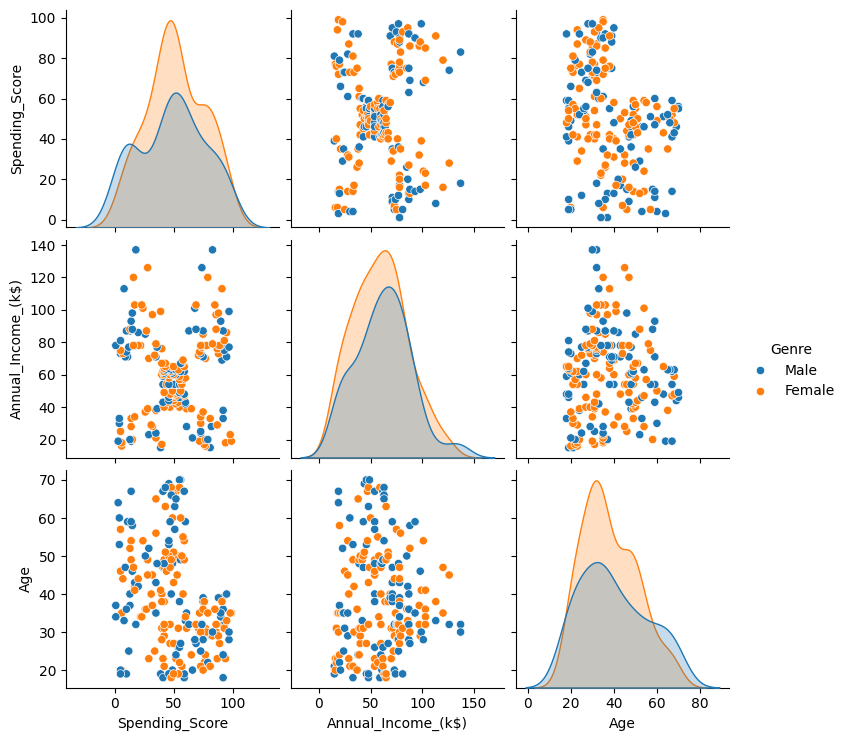

In [9]:
import seaborn as sns

sns.pairplot(df, vars = ['Spending_Score', 'Annual_Income_(k$)', 'Age'], hue = "Genre")

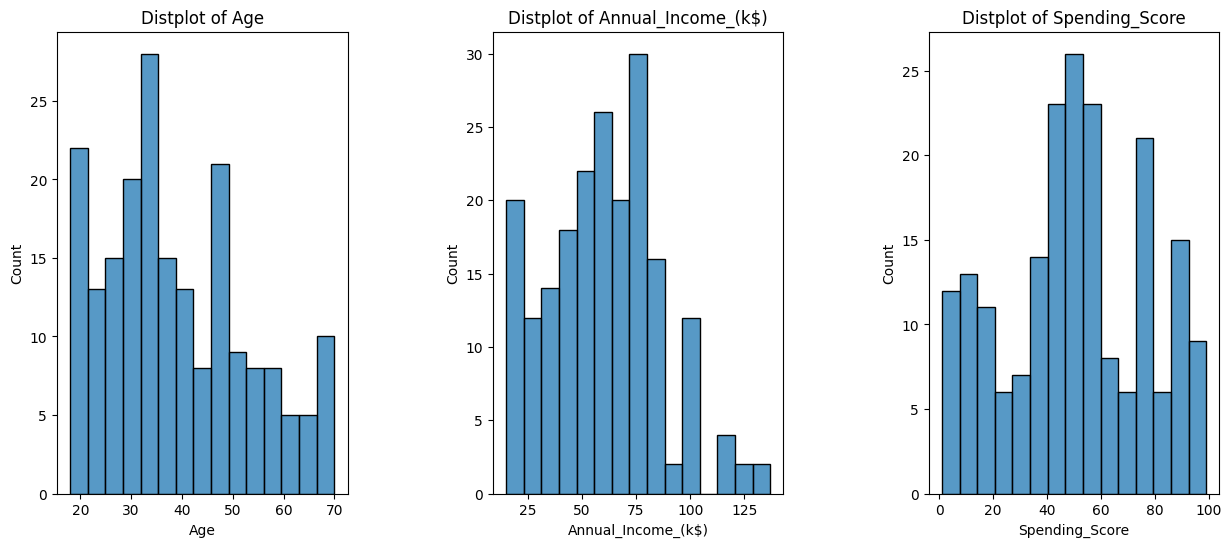

In [10]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual_Income_(k$)' , 'Spending_Score']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.histplot(df[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

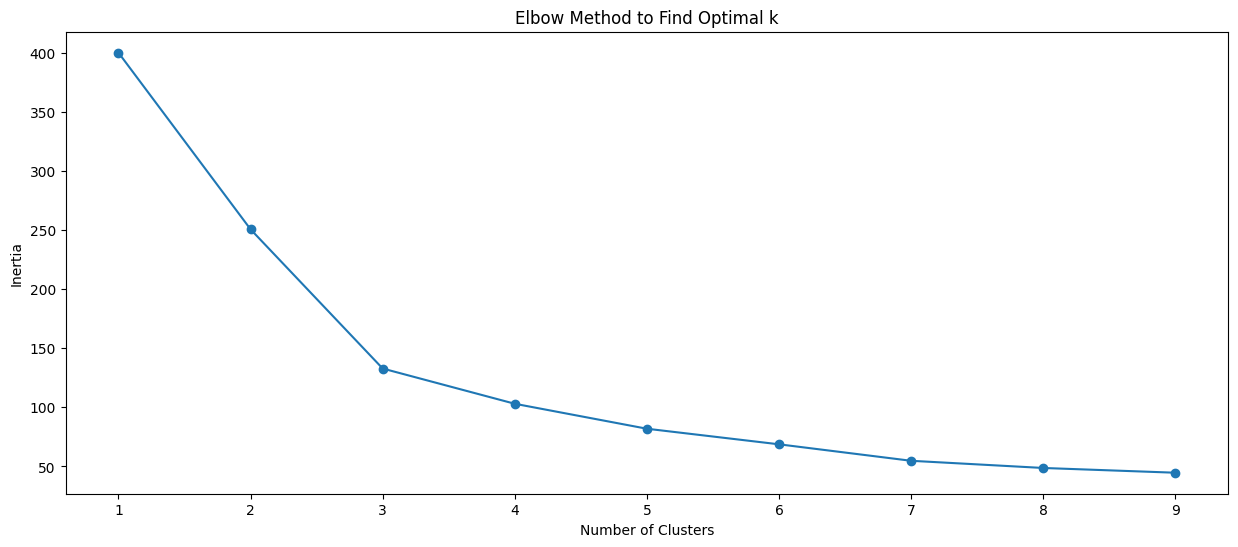

In [11]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(15, 6))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method to Find Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

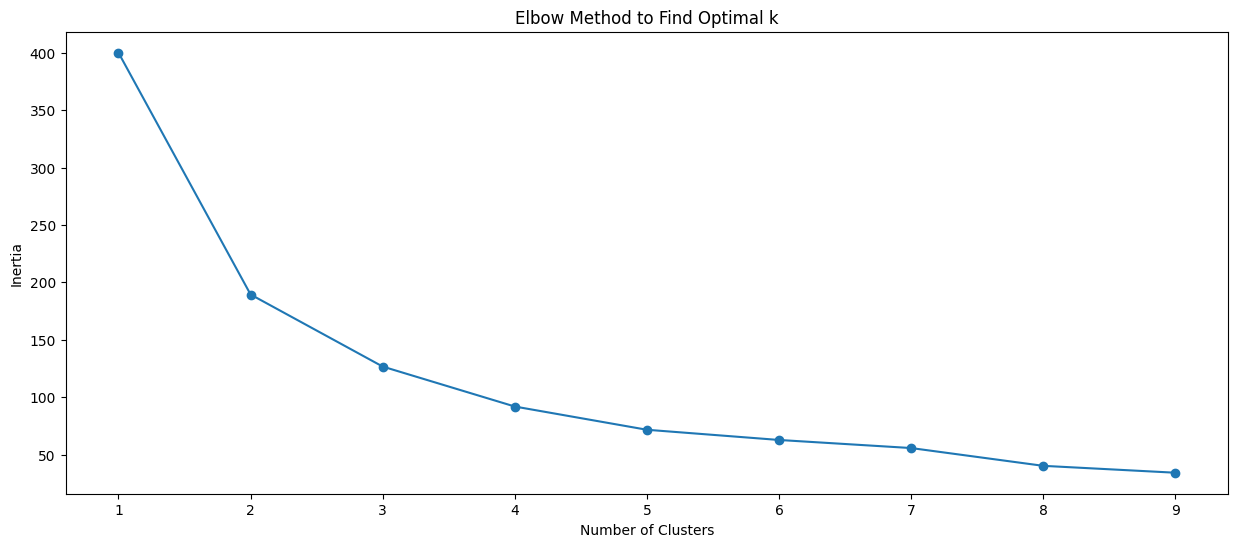

In [12]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(Y_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(15, 6))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method to Find Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

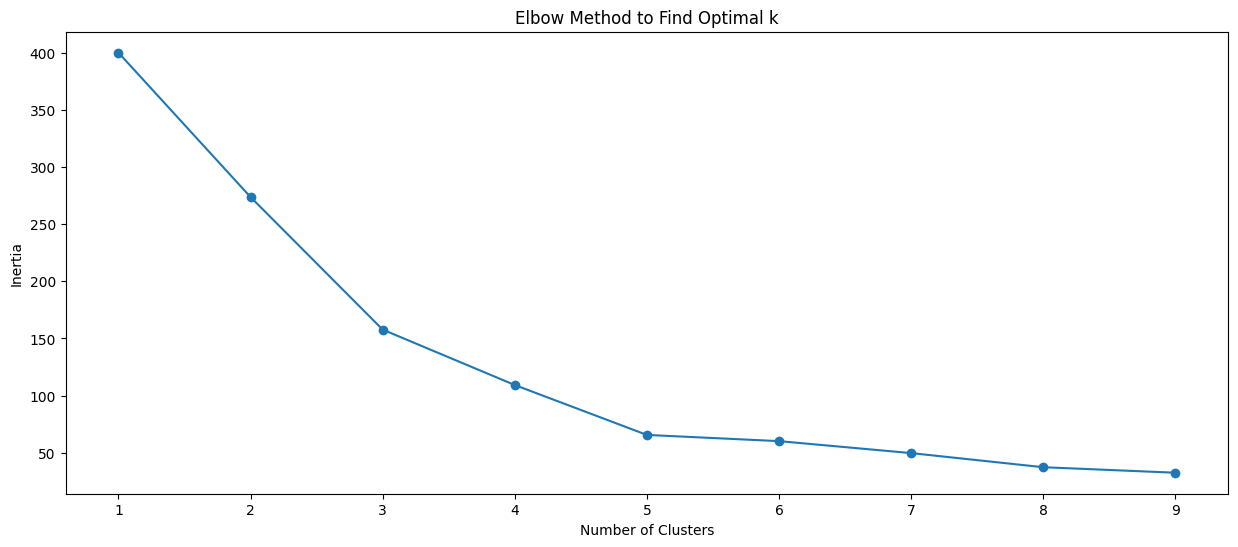

In [13]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(Z_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(15, 6))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method to Find Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

## 3. Introduction to Advanced Clustering Techniques
### Exercise 5: Implementing Hierarchical Clustering
* Objective: Explore hierarchical clustering.
* Tasks:
1) Apply Agglomerative Clustering to the same dataset used in K-Means.
2) Visualize the results using a dendrogram to illustrate the clustering hierarchy.
3) Compare the results with those from K-Means.

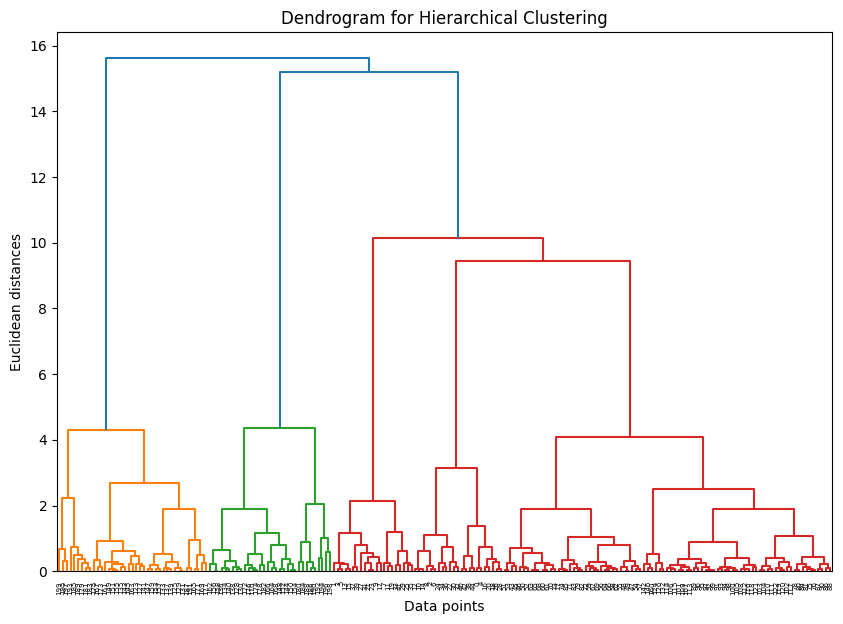

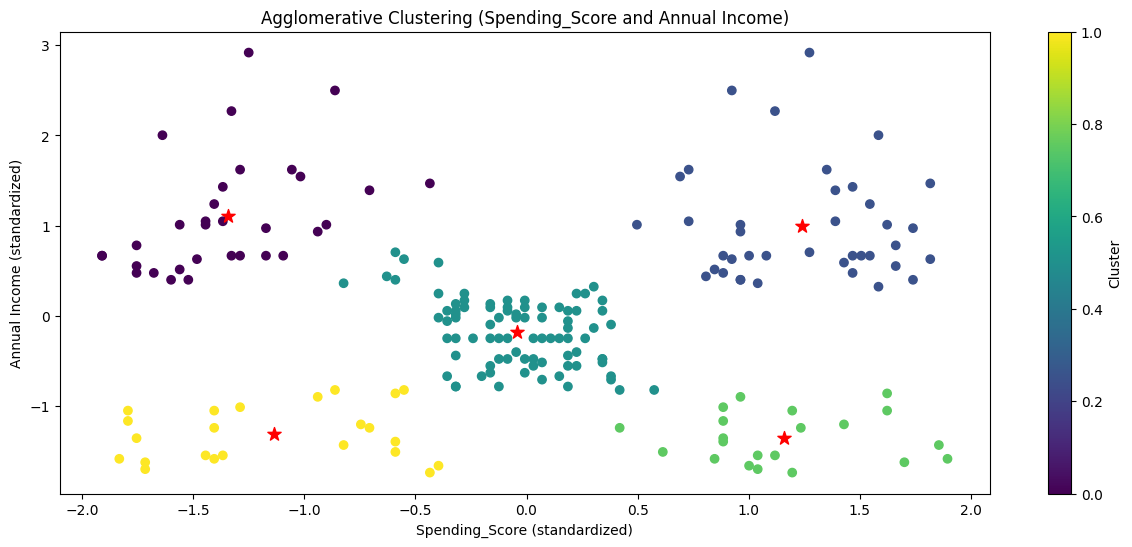

In [14]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(Z_scaled, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data points')
plt.ylabel('Euclidean distances')
plt.show()

hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
df['HC_Cluster'] = hc.fit_predict(Z_scaled)

hc_centroids = []
for label in np.unique(df['HC_Cluster']):
    cluster_points = Z_scaled[df['HC_Cluster'] == label]
    hc_centroids.append(cluster_points.mean(axis=0))
hc_centroids = np.array(hc_centroids)

plt.figure(figsize=(15, 6))
plt.scatter(Z_scaled[:, 0], Z_scaled[:, 1], c=df['HC_Cluster'], cmap='viridis')
plt.scatter(hc_centroids[:, 0], hc_centroids[:, 1], c='red', marker='*', s=100, label='Centroids')
plt.title('Agglomerative Clustering (Spending_Score and Annual Income)')
plt.xlabel('Spending_Score (standardized)')
plt.ylabel('Annual Income (standardized)')
plt.colorbar(label='Cluster')
plt.show()

### Exercise 6: Introduction to DBSCAN
* Objective: Understand density-based clustering.
* Tasks:
1) Implement DBSCAN on the dataset and visualize the clusters.
2) Discuss the parameters (eps and min_samples) and their effect on clustering results.
3) Compare the performance of DBSCAN with K-Means.

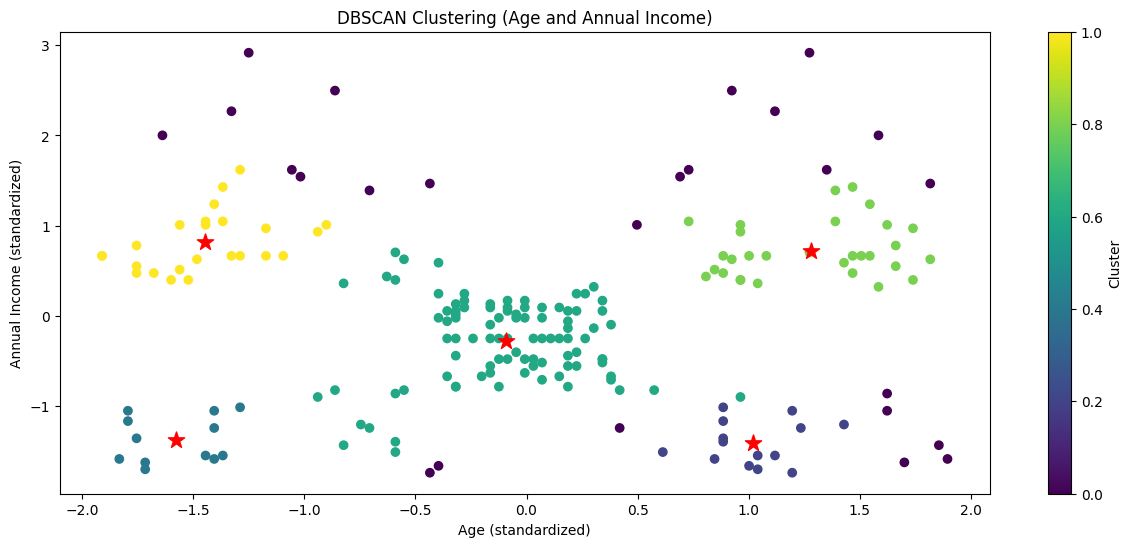

In [15]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.4, min_samples = 8)
df['DBSCAN_Cluster'] = dbscan.fit_predict(Z_scaled)

dbscan_centroids = []
for label in np.unique(df['DBSCAN_Cluster']):
    if label != -1:  
        cluster_points = Z_scaled[df['DBSCAN_Cluster'] == label]
        dbscan_centroids.append(cluster_points.mean(axis=0))
dbscan_centroids = np.array(dbscan_centroids)

plt.figure(figsize=(15, 6))
plt.scatter(Z_scaled[:, 0], Z_scaled[:, 1], c=df['DBSCAN_Cluster'], cmap='viridis')
plt.scatter(dbscan_centroids[:, 0], dbscan_centroids[:, 1], c='red', marker='*', s=150, label='Centroids')
plt.title('DBSCAN Clustering (Age and Annual Income)')
plt.xlabel('Age (standardized)')
plt.ylabel('Annual Income (standardized)')
plt.colorbar(label='Cluster')
plt.show()

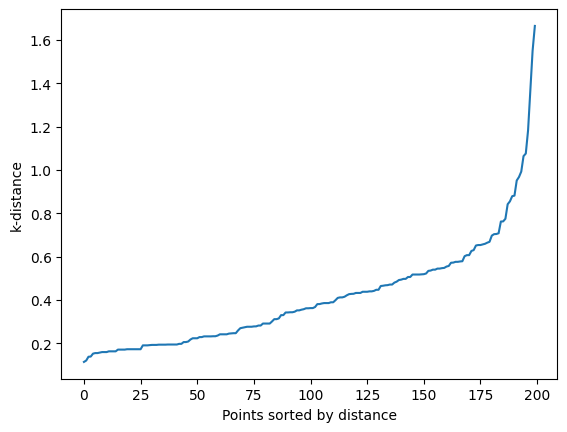

In [16]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

min_samples = 10
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(Z_scaled) 
distances, indices = neighbors_fit.kneighbors(Z_scaled)

distances = np.sort(distances[:, -1], axis=0)
plt.plot(distances)
plt.ylabel('k-distance')
plt.xlabel('Points sorted by distance')
plt.show()